<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Игорь! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Содержание:

1.	Подготовка данных\

   1.1.	Загрузка данных
   
   1.2.	Проверка корректности расчёта эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Определение MAE между расчётами и значением признака.
   
   1.3.	 Анализ признаков, недоступных в тестовой выборке.
   
   1.4.	Проверка качества данных. Проверить и обработать пропуски
   
2.	Анализ данных

   2.1.	Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
   
   2.2.	Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.
   
   2.3.	Иследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
   
3.	Модель\
   3.1. Выбор модели\
   3.2. Моделирование выбранной моделью\
   3.3. Сравнение с константной моделью DummyRegressor.


In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML #to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

from sklearn.metrics import mean_absolute_error #for MAE
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

## Подготовка данных

**1.1. Download data**

In [2]:
df_train_raw = pd.read_csv('/datasets/gold_recovery_train_new.csv') 
df_test_raw = pd.read_csv('/datasets/gold_recovery_test_new.csv') 
df_full_raw = pd.read_csv('/datasets/gold_recovery_full_new.csv') 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно.</font>

**1.2. Проверка корректности расчёта эффективности обогащения на обучающей выборке для признака rougher.output.recovery. Определение MAE между расчётами и значением признака.**

In [3]:
# 1. calculate recovery
# 2. compare with df_train_raw['rougher.output.recovery'] by MAE

# 1. recovery
c_au = df_train_raw['rougher.output.concentrate_au']  #доля золота в концентрате после флотации/очистки;
f_au = df_train_raw['rougher.input.feed_au'] #доля золота в сырье/концентрате до флотации/очистки;
t_au = df_train_raw['rougher.output.tail_au']  #доля золота в отвальных хвостах после флотации/очистки.

df_train_raw['recovery_au'] = (c_au * (f_au - t_au)) / (f_au * (c_au - t_au)) * 100

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

In [4]:
# 2. compare with df_train_raw['rougher.output.recovery'] with MAE
mean_absolute_error(df_train_raw['rougher.output.recovery'] , df_train_raw['recovery_au'])

9.73512347450521e-15

In [5]:
#df_train_raw.drop('recovery_au', axis=1)

**Вывод**

Среднее абсолютно отклонение MAE практически равно нулю. Следовательно, данные подходят для дальнейшего анализа

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

**1.3. Анализ признаков, недоступных в тестовой выборке.** 

In [6]:
#df_train_raw.info()  
#df_train_raw.shape

In [7]:
#df_test_raw.info()  
#df_test_raw.shape

In [8]:
#df_full_raw.info()  
#df_full_raw.shape

**Вывод**

Исследование, недоступных в тестовой выборке данных проведено в Экселе.

В тестовой выборке отсутствуют данные:
1. параметры продукта и хвостов (rougher.output. ...), а также эффективности обогащения после флотации  - целевой признак
2. расчётные характеристики после флотации (rougher.output.concentrate_..)
3. параметры продукта и хвостов после первичной очистки (primary_cleaner.output. ...) 
4. параметры хвостов после вторичной очистки (secondary_cleaner.output.tail_..)
5. параметры финального продукта концентрата (final.output.concentrate_..)  и хвостов (final.output.tail_..)
6. эффективность обогащения финального продукта (final.output.recovery)  - целевой признак

В выборке Train представленны только входные данные и отсутвуют итоговые и расчётные данные, которые появляются в результате завершения каждого этапа.

Dataset df_full_raw хранит все данные из выборок train и test

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

**1.4.	Проверка качества данных. Проверить и обработать пропуски**

In [9]:
#df_train_raw.info()  
#df_train_raw.head(5)

In [10]:
#df_train_raw.info()  
#df_test_raw.head(5)

**Вывод**

1. необходимо исправить формат Date на DateTime

2. в названиях колонок есть символ '.' . На выходе столбцы должны быть расписаны через точку, так как это нужно инженерам. Оставим как есть.

In [11]:
#create copy of datasets

df_train = df_train_raw
df_test = df_test_raw
df_full = df_full_raw

#change data format
display(df_train['date'].head(1))

df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

display(df_train['date'].head(2))
display(df_test['date'].head(2))
display(df_full['date'].head(2))

0    2016-01-15 00:00:00
Name: date, dtype: object

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
Name: date, dtype: datetime64[ns]

0   2016-09-01 00:59:59
1   2016-09-01 01:59:59
Name: date, dtype: datetime64[ns]

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
Name: date, dtype: datetime64[ns]

Проверить и обработать пропуски

In [12]:
print(df_train_raw.isna().sum().sum())
print(df_test_raw.isna().sum().sum())
#display(df_train_raw.loc[df_train_raw['rougher.input.feed_pb'].isna()].head(10))


4100
90


**Вывод**

общее количество пропусков 4100 шт, что составляет 28,9% от выборки train. Достаточно большое количество. Взаимосвязей в пропусках данных не выявлено, скорее всего технические причины.

Обработка: количество пропусков слишком большое для удаления. В описании проекта указано, что соседние по времени параметры часто похожи. Это даёт основание заменить пропуски предыдущим по времени значением.

In [13]:
#process the gaps

#1. create function for substitution of NaN with previous value in df_train

def gaps_train(columns):
    for i in range(len(df_train[columns])):
        if df_train[columns][i] != df_train[columns][i]:
            df_train[columns][i] = df_train[columns][i-1]


#2. transmit array with columns to function
for column in df_train.columns:
    gaps_train(column)

print(df_train_raw.isna().sum().sum())

#3. the same actions for df_test
def gaps_test(columns):
    for i in range(len(df_test[columns])):
        if df_test[columns][i] != df_test[columns][i]:
            df_test[columns][i] = df_test[columns][i-1]


for column in df_test.columns:
    gaps_test(column)

print(df_test_raw.isna().sum().sum())

/tmp/ipykernel_48/1442816144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[columns][i] = df_train[columns][i-1]


0


/tmp/ipykernel_48/1442816144.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[columns][i] = df_test[columns][i-1]


0


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> В Pandas есть метод  `ffill`, он заролняет пропусу=ки предыдущим значением в колонке.</font>

<font color='purple'><b>Комментарий студента:</b></font>\
<font color='purple'><b>Так и знал, что должен быть такой метод :) Не смог нагуглить :(</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

## Анализ данных

**2.1. Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.**

Результаты этапов:
1. Флотация вход:  rougher.input.feed_..
2. Черновой концентрат: rougher.output.concentrate_..
3. Первичная очистка: primary_cleaner.output.concentrate_..
3. Финанльный концентрат: final.output.concentrate_..

Отобразить на графиках по каждому металлу концентрацию на каждом этапе. 

Тип графика - гистограмма

Необходимые данные:
1. среднее значение по этапам для каждого металла. 
   - проверить значения методом describe для выявления аномалий
2. создать DataFrame со значениями для каждого металла
3. вывести графики
4. описать: как меняется концентрация каждого металла 

In [14]:
#print(df_train['rougher.input.feed_au'].describe())
#print()
#print(df_train['rougher.input.feed_ag'].describe())
#print()
#print(df_train['rougher.input.feed_pb'].describe())

#т.к. разброс значений достаточно большой, возмём медиану

#функция для медиан по каждому металлу c графиками

def medians(material):
    stage_1 = df_train['rougher.input.feed_' + material].median()
    stage_2 = df_train['rougher.output.concentrate_' + material].median()
    stage_3 = df_train['primary_cleaner.output.concentrate_' + material].median()
    stage_4 = df_train['final.output.concentrate_' + material].median()
    
    df_concentrate = pd.DataFrame(
        {
            'Stage_name': [
                'rougher_input_'+ material,
                'rough concentrate_'+ material,
                'primary_cleaner_'+ material,
                'final_concentrate_'+ material,      
            ],
            'Concentrate_'+ material: [
                stage_1,
                stage_2,
                stage_3,
                stage_4,
            ],
        }
    )
    
    
    df_concentrate.plot(
        kind='bar',
        x='Stage_name',
        label='Изменение концентрации металла ' + material,
        grid=True,
        figsize=(10, 5)
    );
    plt.title('Изменение концентрации металла ' + material)
    plt.xlabel('Stage name')
    plt.ylabel('Concentrate, %')
    plt.show()

    display(df_concentrate)
    return

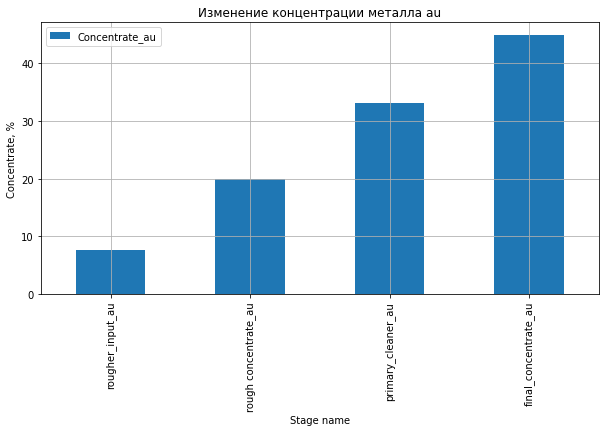

,Stage_name,Concentrate_au
0,rougher_input_au,7.649138
1,rough concentrate_au,19.947312
2,primary_cleaner_au,33.225835
3,final_concentrate_au,44.872436


In [15]:
medians('au')

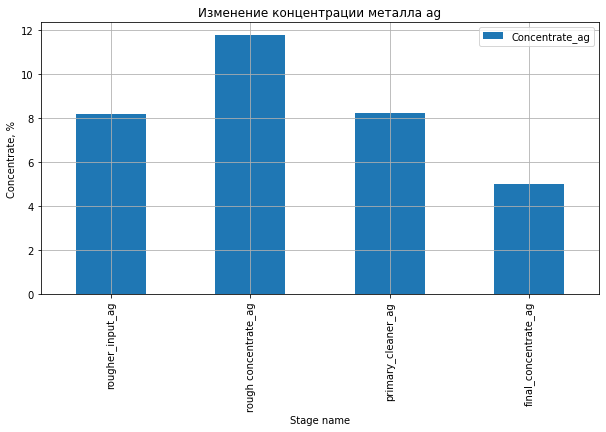

,Stage_name,Concentrate_ag
0,rougher_input_ag,8.156092
1,rough concentrate_ag,11.747362
2,primary_cleaner_ag,8.226247
3,final_concentrate_ag,4.994607


In [16]:
medians('ag')

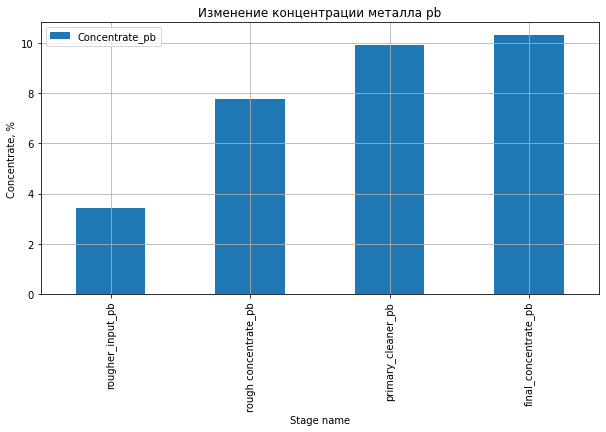

,Stage_name,Concentrate_pb
0,rougher_input_pb,3.414267
1,rough concentrate_pb,7.760435
2,primary_cleaner_pb,9.920598
3,final_concentrate_pb,10.297013


In [17]:
medians('pb')

**Вывод**

Изменение концентрации металла Au : на каждом последующем этапе очистки концентрация металла равномерно увеличивается

Изменение концентрации металла Ag : в черновом концентрате максимальное значение металла. Затем, на каждом последующем этапе очистки концентрация металла равномерно уменьшается.

Изменение концентрации металла Pb : на первых двух этапах очистки концентрация металла равномерно увеличивается. Вторичная очистка практически не влияет на концентрацию, лишь незначительно её увеличивая.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Всё верно!</font>

 **2.2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.**
 
Сравнение можно определить, проанализировав форму графиков распределений.

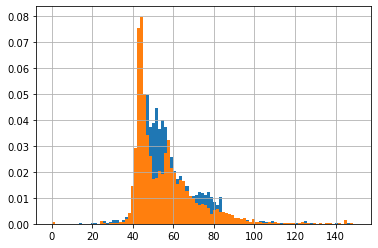

In [18]:
df_train['rougher.input.feed_size'].hist(bins=100, range=(0, 150), density=True);
df_test['rougher.input.feed_size'].hist(bins=100, range=(0, 150), density=True);

**Вывод**

Распределение у обоих выборок сильно не отличаются друг от друга по форме. Расперделения имеют разную высоту, т.к. в выборках разное количество объектов.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font> \
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.</font>

<font color='purple'><b>Комментарий студента:</b></font>\
<font color='purple'><b>Принял, добавил</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

**2.3. Иследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

1. Рассматриваем 4 стадии: 'rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_'
2. Складываем концентрации на каждом этапе
3. Строим график динамики от этапа к этапу
4. Строим график расперделения суммарной концентрации на каждом этапе

In [19]:
#Складываем концентрации на каждом этапе
#Строим график динамики от этапа к этапу

df_train['df_sum_rouger_input'] = (df_train['rougher.input.feed_au'] 
                             + df_train['rougher.input.feed_ag'] 
                             + df_train['rougher.input.feed_pb'] 
                             + df_train['rougher.input.feed_sol'])

df_train['df_sum_rouger_output'] = (df_train['rougher.output.concentrate_au'] 
                             + df_train['rougher.output.concentrate_ag'] 
                             + df_train['rougher.output.concentrate_pb'] 
                             + df_train['rougher.output.concentrate_sol'])

df_train['df_sum_primary'] = (df_train['primary_cleaner.output.concentrate_au'] 
                             + df_train['primary_cleaner.output.concentrate_ag'] 
                             + df_train['primary_cleaner.output.concentrate_pb'] 
                             + df_train['primary_cleaner.output.concentrate_sol'])

df_train['df_sum_final'] = (df_train['final.output.concentrate_au'] 
                             + df_train['final.output.concentrate_ag'] 
                             + df_train['final.output.concentrate_pb'] 
                             + df_train['final.output.concentrate_sol'])

In [20]:
#функция для медиан по всем металлам c графиками

def medians_sum():
    stage_1 = df_train['df_sum_rouger_input'].median()
    stage_2 = df_train['df_sum_rouger_output'].median()
    stage_3 = df_train['df_sum_primary'].median()
    stage_4 = df_train['df_sum_final'].median()
    
    df_concentrate = pd.DataFrame(
        {
            'Stage_name': [
                'rougher_input',
                'rough concentrate',
                'primary_cleaner_concentrate',
                'final_concentrate',      
            ],
            'Concentrate': [
                stage_1,
                stage_2,
                stage_3,
                stage_4,
            ],
        }
    )
    
    
    df_concentrate.plot(
        kind='bar',
        x='Stage_name',
        label='Изменение концентрации суммы металлов',
        grid=True,
        figsize=(10, 5)
    );
    plt.title('Изменение концентрации суммы металлов')
    plt.xlabel('Stage name')
    plt.ylabel('Concentrate, %')
    plt.show()

    display(df_concentrate)
    return

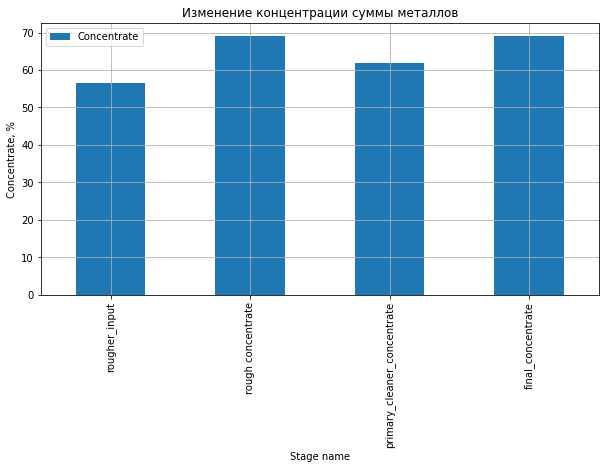

,Stage_name,Concentrate
0,rougher_input,56.627635
1,rough concentrate,69.175663
2,primary_cleaner_concentrate,61.786946
3,final_concentrate,69.141502


In [21]:
medians_sum()

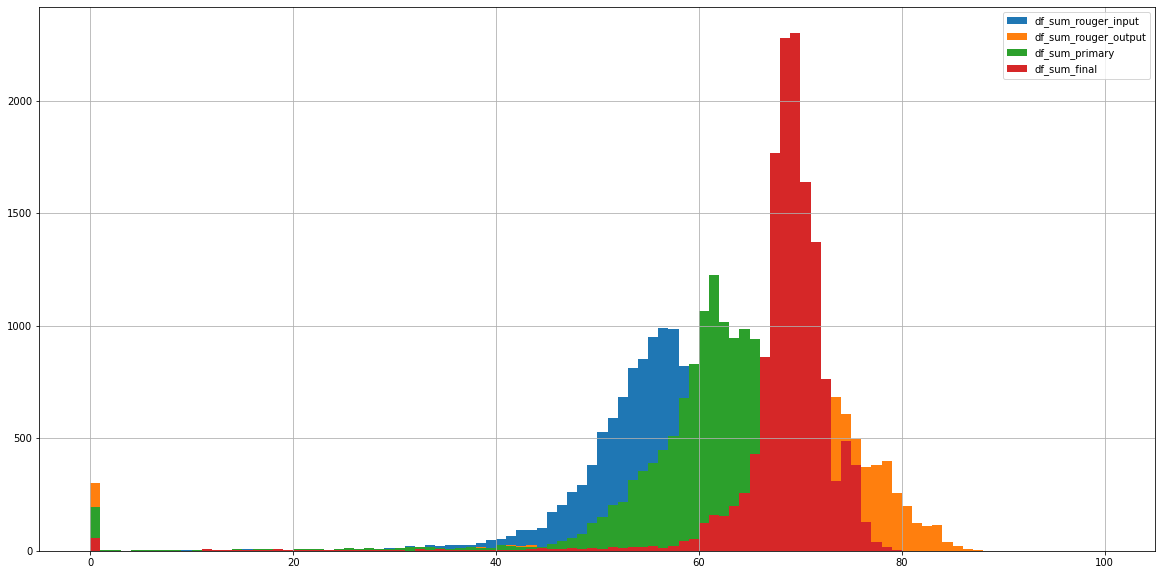

In [22]:
#Строим график расперделения суммарной концентрации на каждом этапе
df_train['df_sum_rouger_input'].hist(bins=100, range=(0, 100), figsize=(20, 10), legend=True);
df_train['df_sum_rouger_output'].hist(bins=100, range=(0, 100), legend=True);
df_train['df_sum_primary'].hist(bins=100, range=(0, 100), legend=True);
df_train['df_sum_final'].hist(bins=100, range=(0, 100), legend=True);

In [23]:
#удаление нулевых значений

print('Количество строк до удаления: ', df_train.shape)
print()

df_train = df_train.query('df_sum_rouger_input > 0.5')
df_train = df_train.query('df_sum_rouger_output > 0.5')
df_train = df_train.query('df_sum_primary > 0.5')
df_train = df_train.query('df_sum_final > 0.5')

print('Количество строк после удаления: ', df_train.shape)

Количество строк до удаления:  (14149, 92)

Количество строк после удаления:  (13600, 92)


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Выбросы удалены.</font>

**Вывод**

1. Изменение концентрации суммы металлов от этапа к этапу: в среднем, концентрация металлов находится на уровне 65% на каждом этапе. При этом наименбшая концентрация металлов содержится во входящем сырье.
2. Распередения сумм на каждом этапе: все распределения походи на нормальные. Присутствуют аномальные выборсы около нуля для всех стадий. Ноль может обозначать отсутствие элемента, что не очень правдоподобно. Околонулевые больше похоже на правду и их можно оставить.

## Модель

1. Написать функцию для расчёта sMAPE и финального sMAPE
2. Выделить целевые признаки и признаки
3. Выбрать лучшую модель по final_sMAPE
4. Проверить лучшую модель на тестовой выборке
5. Описать выводы

In [24]:
#sMAPE функция

#функция для sMAPE
def smape(target_true, target_predictions):
    numerator = np.abs(target_true - target_predictions)
    denominator = (np.abs(target_true) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_true) * np.sum(numerator / denominator) * 100 
 
#функция для итогового sMAPE
def final_smape(smape_rough, smape_final):
     return 0.25 * smape_rough + 0.75 * smape_final
    
#scorer. Дальше этот scorer используется в метриках качества кросс-валидации.
scorer = make_scorer(smape, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` и `final_smape` расчитаны верно.</font>

In [25]:
#выделяем фичи и таргеты
# 1. фичи для rough и final должны соответсвовать тестовой выборке - создать датасет для train rough и для train final
# 2. фичи в тренировочной выборке должны быть такими же как и в тестовой выборке, 
#т.к. в релаьности будет набор данных как в тестовой
# 3. в тестовую выборку нужно добавить трагеты и недостающие признаки

#dataset train rough
df_train_rough = df_train [['date', 
                               'rougher.input.feed_ag',
                               'rougher.input.feed_pb',
                               'rougher.input.feed_rate',
                               'rougher.input.feed_size',
                               'rougher.input.feed_sol',
                               'rougher.input.feed_au', 
                               'rougher.input.floatbank10_sulfate',
                               'rougher.input.floatbank10_xanthate',
                               'rougher.input.floatbank11_sulfate',
                               'rougher.input.floatbank11_xanthate',
                               'rougher.state.floatbank10_a_air',
                               'rougher.state.floatbank10_a_level',
                               'rougher.state.floatbank10_b_air',
                               'rougher.state.floatbank10_b_level',
                               'rougher.state.floatbank10_c_air',
                               'rougher.state.floatbank10_c_level',
                               'rougher.state.floatbank10_d_air',
                               'rougher.state.floatbank10_d_level',
                               'rougher.state.floatbank10_e_air',
                               'rougher.state.floatbank10_e_level',
                               'rougher.state.floatbank10_f_air',
                               'rougher.state.floatbank10_f_level']]

In [26]:
#dataset train final

#columns_from_test = df_test.columns #взял список названий колонок из теста
#print(columns_from_test)

df_train_final = df_train[['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level',
                 ]]
#df_train_final.info()

In [27]:
features_train_rough = df_train_rough.drop(['date'], axis=1)
features_train_final = df_train_final.drop(['date'], axis=1)
#features_train_final = df_train_final.drop(['date','final.output.recovery','rougher.output.recovery', 
#                                      'df_sum_final', 
#                                      'recovery_au', 'df_sum_rouger_input', 
#                                      'df_sum_rouger_output', 'df_sum_primary'], axis=1)
            
target_train_rough = df_train['rougher.output.recovery'].loc[features_train_rough.index]
target_train_final = df_train['final.output.recovery'].loc[features_train_final.index]

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> В момент предполгаемого применения модели в продакте, доступны только признаки собранные в тестовом датасете. Нужно построить модель работающую только с этими признаками.  </font>

<font color='purple'><b>Комментарий студента:</b></font>\
<font color='purple'><b>Да, верно, такая и была логика.\
    для стадии флотации (rough) фичи и таргетб по-моему, определены верно.\
    Вопрос остаётся с final. После флотации, к фичам для rough должны прибавиться фичи rougher.output.concentrate_ и rougher.output.tail_.
    Таким образом, фичи для final должны быть те, что содержаться в тестовой выборке + rougher.output.. Логика верна?</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> \
<font color='blue'>Процесс, похоже, непрерывный и оценить надо до начала процесса, сразу восстановление в обоих этапах, поэтому тестовая выборка предоставлена с этим набором признаков.\
'rougher.output.recovery' и 'final.output.recovery' коррелируют между собойи зная один уже можно судить о другом.\
Для  обоих этапов нужны только признаки из тестового датасета.</font>

<font color='purple'><b>Комментарий студента 2:</b></font>\
<font color='purple'><b>Принял, убрал rougher.output..</b></font>

In [28]:
#test
#создаём датасеты для тестовой выборки из full для rough и final

df_test_full = df_test.drop(df_test.columns[1:], axis=1).merge(df_full, on='date', how='left')

df_test_full = df_test_full.dropna()

df_test_rough = df_test_full [['rougher.output.recovery', 
                               'rougher.input.feed_ag',
                               'rougher.input.feed_pb',
                               'rougher.input.feed_rate',
                               'rougher.input.feed_size',
                               'rougher.input.feed_sol',
                               'rougher.input.feed_au', 
                               'rougher.input.floatbank10_sulfate',
                               'rougher.input.floatbank10_xanthate',
                               'rougher.input.floatbank11_sulfate',
                               'rougher.input.floatbank11_xanthate',
                               'rougher.state.floatbank10_a_air',
                               'rougher.state.floatbank10_a_level',
                               'rougher.state.floatbank10_b_air',
                               'rougher.state.floatbank10_b_level',
                               'rougher.state.floatbank10_c_air',
                               'rougher.state.floatbank10_c_level',
                               'rougher.state.floatbank10_d_air',
                               'rougher.state.floatbank10_d_level',
                               'rougher.state.floatbank10_e_air',
                               'rougher.state.floatbank10_e_level',
                               'rougher.state.floatbank10_f_air',
                               'rougher.state.floatbank10_f_level']]

df_test_final = df_test_full[['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level',
                 ]]

features_test_rough = df_test_rough.drop(['rougher.output.recovery'], axis=1)
features_test_final = df_test_final
target_test_rough = df_test_rough['rougher.output.recovery'].loc[features_test_rough.index]
target_test_final = df_test_full['final.output.recovery'].loc[features_test_final.index]

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно, при пересечении таблиц лучше привязаться ко времени.</font>

Комментарий для моего пользования:
на примерах Линейной регрессии с CV и Леса с GSCV.
У моменту кросс-валидации должна быть готова функция метрики sMAPE как scorer:
scorer = make_scorer(smape, greater_is_better=False)
Дальше этот scorer используется в метриках качества кросс-валидации.
Что нужно сделать, что получить метрику качества для LinearRegression
Создать модель LinearRegression
В функцию cross_val_score указать в качестве модели модель LR, добавить признаки и таргеты, и в качестве скоринга наш scorer : scoring=scorer
Ты получаешь массив отрицательных значений sMAPE. Отрицательными они стали за счет параметра greater_is_better=False . Это исправлять не нужно, тут все ок
Получить среднее значение по массиву из кросс-валидации и умножить на -1 , чтобы получить метрику на CV

Для остальных моделей с GridSearchCV:
Создать модель и таблицу параметров
Задать таблицу поиска GridSearchCV с моделью и параметрами выше и в качестве скоринга установить наш наш scorer : scoring=scorer
Ты получаешь лучшую модель с параметрами и лучшую метрику со знаком -.
С помощью .best_params_ из таблицы поиска получаешь параметры, с помощью .best_score_ * -1 - получаешь метрику sMAPE

Для кросс-валидации механика проверки метрики - "больше-лучше" по умолчанию. При использовании greater_is_better=False  к метрике добавляется минус, означая что самая большая метрика будет ближе к 0, а убирая знак минус это становится самой меньшим значением, что нам и нужно по логике "меньше-лучше".

In [29]:
#model LinearRegression
model = LinearRegression()
scores_LR_rough = cross_val_score(model, features_train_rough, target_train_rough, cv=5, scoring=scorer).mean() * -1
scores_LR_final = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring=scorer).mean() * -1
print('Лучшее итоговое sMAPE для модели Линейная Регрессия: {:.2f}'.format(final_smape(scores_LR_rough, scores_LR_final)))


Лучшее итоговое sMAPE для модели Линейная Регрессия: 9.94


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что оценка по целевой метрике!</font>

In [30]:
#DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=123456)
param_grid = {'max_depth': range(2, 11)}
scores_DTR_rough = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
scores_DTR_rough.fit(features_train_rough, target_train_rough)


print('Лучшее значение sMAPE rough для дерева решений: {:.2f} при значениях гиперпараметров: {}'.
      format(-scores_DTR_rough.best_score_, scores_DTR_rough.best_params_))

scores_DTR_final = GridSearchCV(model, param_grid, cv=5, scoring=scorer)
scores_DTR_final.fit(features_train_final, target_train_final)

print('Лучшее значение sMAPE final для дерева решений: {:.2f} при значениях гиперпараметров: {}'.
      format(-scores_DTR_final.best_score_, scores_DTR_final.best_params_))


print('Лучшее итоговое sMAPE для модели дерева решений: {:.2f}'.format(final_smape(-scores_DTR_rough.best_score_, 
                                                                                   -scores_DTR_final.best_score_)))

Лучшее значение sMAPE rough для дерева решений: 6.94 при значениях гиперпараметров: {'max_depth': 5}
Лучшее значение sMAPE final для дерева решений: 9.24 при значениях гиперпараметров: {'max_depth': 3}
Лучшее итоговое sMAPE для модели дерева решений: 8.66


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

**Вывод**
Итоговое значение sMAPE выше для модели Дерево решений меньше (лучше), чем для модели Линейной регрессии. Выбираем модель Дерево решений с параметрами max_depth 5 и 3 для rough и final соответсвенно  для тестирования на тестовой выборке

**3.2. Моделирование выбранной моделью.**

In [36]:
#тестирование на test 

#rough
model = DecisionTreeRegressor(random_state=123456, max_depth=5)
model.fit(features_train_rough, target_train_rough)
predictions = model.predict(features_test_rough)
smape_rough = smape(predictions, target_test_rough)

#final
model = DecisionTreeRegressor(random_state=123456, max_depth=3)
model.fit(features_train_final, target_train_final)
predictions = model.predict(features_test_final)
smape_final = smape(predictions, target_test_final)

print('Итоговое sMAPE для модели Дерево решений на тестовой выборке: {:.2f}'.
      format(final_smape(smape_rough, smape_final)))

Итоговое sMAPE для модели Дерево решений на тестовой выборке: 8.60


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

**3.3. Сравнение с константной моделью DummyRegressor.**

In [34]:
#сравнение с константной моделью DummyRegressor

#rough
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_rough, target_train_rough)
predictions = dummy_regr.predict(features_test_rough)
smape_rough = smape(predictions, target_test_rough)

#final
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_final, target_train_final)
predictions = dummy_regr.predict(features_test_final)
smape_final = smape(predictions, target_test_final)

print('Итоговое sMAPE для модели DummyRegressor на тестововй выборке: {:.2f}'.
      format(final_smape(smape_rough, smape_final)))

Итоговое sMAPE для модели DummyRegressor на тестововй выборке: 8.78


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Нужно сравнить с константной моделью, например с `DummyRegressor`, из одного значения метрики не ясно насколько адекватно предсказание моделей. )</s></font>

<font color='purple'><b>Комментарий студента:</b></font>\
<font color='purple'><b>Принял, согласен, добавил. Результат получился хуже (sMAPE выше), чем на выбранной модели. </b></font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Очень не хватает общего вывода. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы.</s></font>

***ОБЩИЙ ВЫВОД***

в ходе проекта были обработаны и приведены в рабочее состояние данные в предоставленных датасетах, проанализированы динамика изменения концентрации металлов на различных этапах очистки, суммарной концентарции всех веществ на разных стадиях. В ходе подготовки к выбору модели машшинного обучения были отобраны необходимые признаки для обучения. Выбраны и обучены две модели, из которых только одна была протестирована на тестовой выборке. Протестированная модель сопоставлялась с константной моделью для определения её адекватности.

В результате работы можно сделать следующие выводы:
1. Концентрация металлов по этапам очистки:\
   1.1. Изменение концентрации металла Au : на каждом последующем этапе очистки концентрация металла равномерно увеличивается\
   1.2. Изменение концентрации металла Ag : в черновом концентрате максимальное значение металла. Затем, на каждом последующем этапе очистки концентрация металла равномерно уменьшается.\
   1.3. Изменение концентрации металла Pb : на первых двух этапах очистки концентрация металла равномерно увеличивается. Вторичная очистка практически не влияет на концентрацию, лишь незначительно её увеличивая.\
   
2. Суммарная концентрация металлов:\
   2.1. Изменение концентрации суммы металлов от этапа к этапу: в среднем, концентрация металлов находится на уровне 65% на каждом этапе. При этом наименьшая концентрация металлов содержится во входящем сырье.\
   2.2. Присутствуют аномальные выбросы около нуля для всех стадий. Ноль может обозначать отсутствие элемента, что не очень правдоподобно. Было принято решение удалить нулевые значения и не использовать для целей обучения модели.\

3. Модель машинного обучения:\
   3.1. По результатам обучения двух моделей была выбрана модель Дерево решений. Модель была выбрана по целевой метрике - Итоговая sMAPE - показав значение 8,66 и опредив модель Линейная регрессия.
   3.2. При сравнении с константной моделью, где в качестве предсказания было среднее значение целевого признака, модель Дерево решений показала лучший результат целевой метрики - Итоговая sMAPE. Это означает, что модель адекватна и может применяться для машшиного обучения.

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Игорь, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Для обучения моделей используй только признаки доступные до начала тех.процесса.</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>
<ul><font color='red'>Добавь Общий вывод по работе.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='purple'><b>Комментарий студента:</b></font>\
<font color='purple'><b>Павел, спасибо за ревью и обратную связь. Все замечания исправил.</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Игорь, большое спасибо за доработку. Появилась константная модель т общий вывод.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Для обучения моделей используй только признаки доступные до начала тех.процесса.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке